In [63]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [64]:
train=pd.read_csv('C:/Users/hp/Desktop/Projects/Credit Card Fraud Detection/DATA/train.csv')
test=pd.read_csv('C:/Users/hp/Desktop/Projects/Credit Card Fraud Detection/DATA/test.csv')
#sample_sub=pd.read_csv('C:/Users/hp/Desktop/Projects/Credit Card Fraud Detection/DATA/sample_submission.csv')

In [65]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [66]:
seconds_per_day = 3600*24
train["Day"] = train["Time"].apply(lambda x: 1 if x<seconds_per_day else 2)
train["Hour"] = train["Time"].apply(lambda x: (x%seconds_per_day)//3600 + 1)
test["Day"] = test["Time"].apply(lambda x: 1 if x<seconds_per_day else 2)
test["Hour"] = test["Time"].apply(lambda x: (x%seconds_per_day)//3600 + 1)
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V23,V24,V25,V26,V27,V28,Amount,Class,Day,Hour
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,1,1.0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,1,1.0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,1,1.0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,1,1.0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,1,1.0


In [67]:
a=train.corr().abs()>0.3

<Axes: >

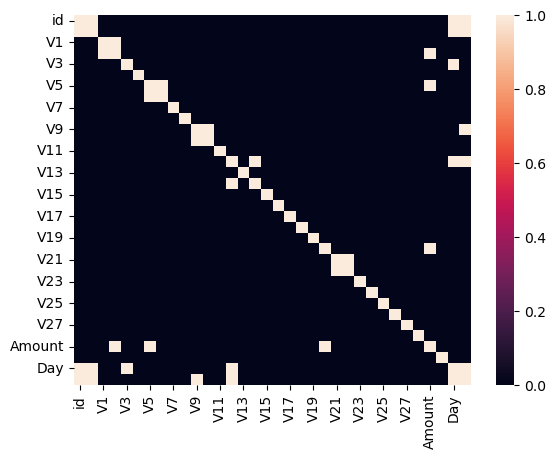

In [68]:
sns.heatmap(a)

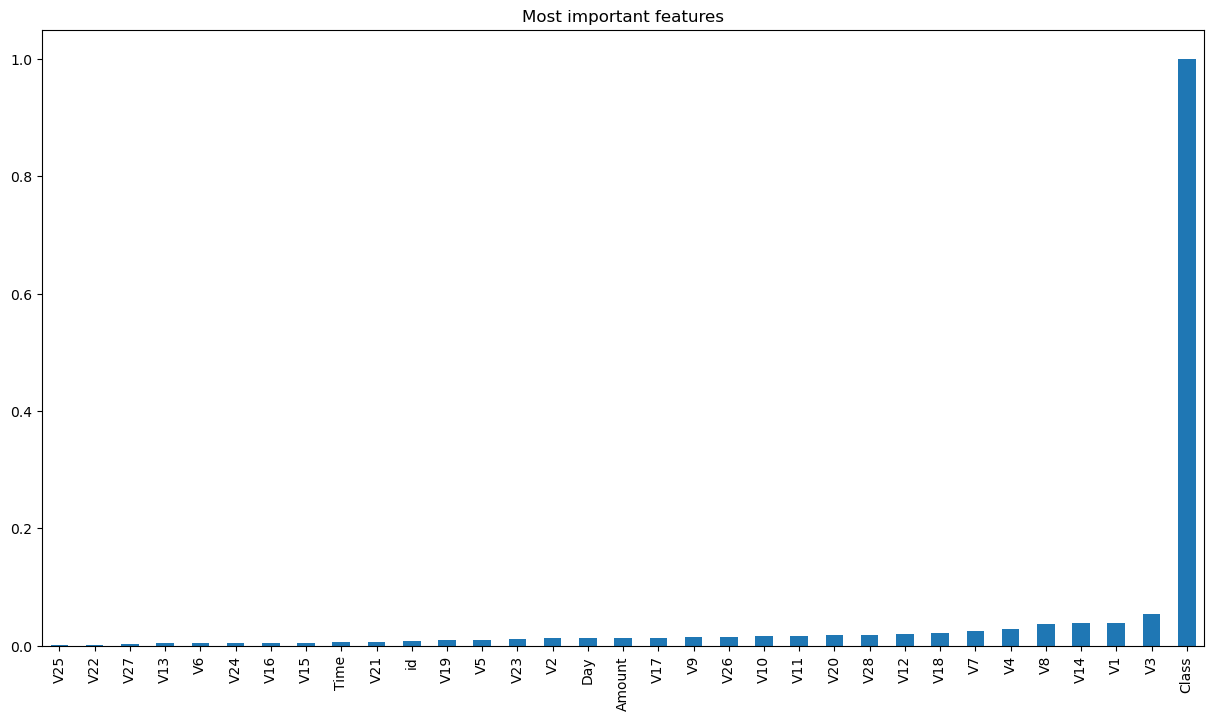

In [69]:
df=train
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [ ]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

In [ ]:
sns.jointplot(x='V17', y='V12',hue='Class', data=df, palette = 'dark')

In [ ]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [ ]:
y = train['Class']
X = train.drop('Class', axis=1)


sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), columns=X.columns, index=X.index)
test = pd.DataFrame(sc.transform(test.values), columns=test.columns, index=test.index)


In [ ]:
#Neural network

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split the data into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

# Predict on the validation set
y_pred = model.predict(X_valid)

# Calculate the AUC score for the validation set
auc = roc_auc_score(y_valid, y_pred)
print(f"AUC score: {auc:.2f}")


In [ ]:
#RandomForest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Split the data into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_params = {
    'n_estimators': 200,          # Number of trees in the forest
    'min_samples_split': 5,      # Minimum number of samples required to split an internal node
    'min_samples_leaf': 2,       # Minimum number of samples required to be at a leaf node
    'max_depth': None,           # Maximum depth of the tree (None means no limit)
    'max_features': 'auto',      # Number of features to consider when looking for the best split
    'random_state': 42
}

# Create and train the RandomForest model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict_proba(X_valid)[:, 1]

# Calculate the AUC score for the validation set
auc = roc_auc_score(y_valid, y_pred)
print(f"AUC score: {auc:.2f}")


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define Decision Tree Classifier parameters
dt_params = {
    'max_depth': 7,
    'min_samples_split': 96,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'random_state': 42
}

dt_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train , y_valid = y.iloc[train_idx] , y.iloc[valid_idx]
    
    dt_model = DecisionTreeClassifier(**dt_params)
    dt_model.fit(X_train, y_train)
    
    y_pred = dt_model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred)
    dt_scores.append(auc)
    
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')

print("Mean AUC:", np.mean(dt_scores))


In [ ]:
#Naive Bayes classifier

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Split the data into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_prob = nb_model.predict_proba(X_valid)[:, 1]

# Calculate the AUC score for the validation set
auc = roc_auc_score(y_valid, y_pred_prob)
print(f"AUC score: {auc:.2f}")


In [ ]:
sample_sub.to_csv('Result.csv',index=False)